In [2]:
import yfinance as yf
import pandas as pd


In [3]:
df = yf.download('WIPRO.NS')

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [4]:
df.head()

Price,Close,High,Low,Open,Volume
Ticker,WIPRO.NS,WIPRO.NS,WIPRO.NS,WIPRO.NS,WIPRO.NS
Date,,,,,
1996-01-01,0.500812,0.500812,0.500812,0.500812,39999
1996-01-02,0.461860,0.461860,0.461860,0.461860,79999
1996-01-03,0.478554,0.478554,0.478554,0.478554,39999
1996-01-04,0.478554,0.478554,0.478554,0.478554,239999
1996-01-05,0.478554,0.478554,0.478554,0.478554,0


In [5]:
df.tail()

Price,Close,High,Low,Open,Volume
Ticker,WIPRO.NS,WIPRO.NS,WIPRO.NS,WIPRO.NS,WIPRO.NS
Date,,,,,
2025-04-21,238.449997,240.800003,237.399994,237.399994,16298364
2025-04-22,234.149994,239.000000,233.500000,238.449997,18367713
2025-04-23,243.600006,245.350006,236.100006,237.199997,31898042
2025-04-24,242.750000,245.149994,241.500000,244.800003,23000820
2025-04-25,241.350006,246.149994,238.050003,243.949997,10546645


In [6]:
!pip install tensorflow

In [7]:
import matplotlib.pyplot as plt
import math
import numpy as np
from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, LSTM



Historical Data Visualisation

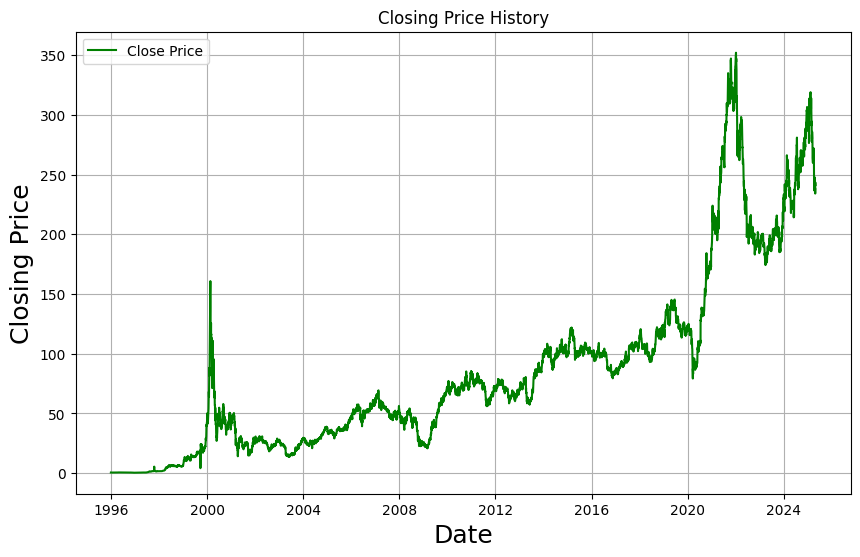

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.title('Closing Price History')
plt.plot(df['Close'], label='Close Price', color='green')
plt.ylabel('Closing Price', fontsize=18)
plt.xlabel('Date', fontsize=18)
plt.legend()
plt.grid(True)
plt.show()

In [9]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Fetch historical data with safety check
df = yf.download('WIPRO.NS', start='2023-01-01', end='2024-01-01')

if df.empty:
    raise ValueError("No data fetched. Check ticker symbol, date range, or connection.")

# Filter and scale
close_data = df[['Close']]
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(close_data)

scaled_data



[*********************100%***********************]  1 of 1 completed


array([[0.31176582],
       [0.34643293],
       [0.28273248],
       [0.25846523],
       [0.21599836],
       [0.30093238],
       [0.31176582],
       [0.31869924],
       [0.32433248],
       [0.31913254],
       [0.35986647],
       [0.34036639],
       [0.39973351],
       [0.40146673],
       [0.39930021],
       [0.43266713],
       [0.43788007],
       [0.39400489],
       [0.36359658],
       [0.40008661],
       [0.37054734],
       [0.40139004],
       [0.46264106],
       [0.44917446],
       [0.42093809],
       [0.38488245],
       [0.43918351],
       [0.45264957],
       [0.43092958],
       [0.3857515 ],
       [0.42484813],
       [0.44483057],
       [0.46655083],
       [0.43527347],
       [0.44178957],
       [0.40443077],
       [0.3384012 ],
       [0.3279756 ],
       [0.322328  ],
       [0.29669851],
       [0.26802748],
       [0.30191145],
       [0.2767158 ],
       [0.29756729],
       [0.32623804],
       [0.31624655],
       [0.29452656],
       [0.285

In [10]:
scaled_data
train_data_len = math.ceil(len(scaled_data)*0.8)
train_data_len

196

In [11]:
train_data = scaled_data[0:train_data_len,:]
x_train = []
y_train=[]
for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i,0])
  if i==60:
    print(x_train)
    print(y_train)


[array([0.31176582, 0.34643293, 0.28273248, 0.25846523, 0.21599836,
       0.30093238, 0.31176582, 0.31869924, 0.32433248, 0.31913254,
       0.35986647, 0.34036639, 0.39973351, 0.40146673, 0.39930021,
       0.43266713, 0.43788007, 0.39400489, 0.36359658, 0.40008661,
       0.37054734, 0.40139004, 0.46264106, 0.44917446, 0.42093809,
       0.38488245, 0.43918351, 0.45264957, 0.43092958, 0.3857515 ,
       0.42484813, 0.44483057, 0.46655083, 0.43527347, 0.44178957,
       0.40443077, 0.3384012 , 0.3279756 , 0.322328  , 0.29669851,
       0.26802748, 0.30191145, 0.2767158 , 0.29756729, 0.32623804,
       0.31624655, 0.29452656, 0.28583824, 0.25412676, 0.20199819,
       0.16985205, 0.14465695, 0.17636816, 0.09513444, 0.08861833,
       0.08861833, 0.04604686, 0.0482188 , 0.04387464, 0.        ])]
[np.float64(0.02476071346017772)]


In [12]:
x_train= np.array(x_train)
y_train = np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

type(x_train)
x_train.shape



(136, 60, 1)

modelling

In [13]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [26]:
model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(x_train, y_train, batch_size = 40, epochs=40)

Epoch 1/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 58ms/step - loss: 0.0077
Epoch 2/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - loss: 0.0072
Epoch 3/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 0.0071
Epoch 4/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 0.0058
Epoch 5/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 0.0058
Epoch 6/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 0.0054
Epoch 7/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.0059
Epoch 8/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.0058
Epoch 9/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 0.0052
Epoch 10/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 0.0049
Epoch 11/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - loss: 0.0054
Epoch 12/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - loss: 0.0049
Epoch 13/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 89ms/step - loss: 0.0049
Epoch 14/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - loss: 0.0044
Epoch 15/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step - loss: 0.0047
Epoch 16/40
4/4 ━━━━━━━━━━━━━━━━━━

In [27]:
test_data = scaled_data[train_data_len-60:, :]
x_test = []
y_test = df.iloc[train_data_len:, :]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])



In [28]:
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))


In [29]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
rmse = np.sqrt(np.mean(predictions-y_test)**2)
rmse

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 330ms/step


np.float64(2693454.883829192)

Visualisation

<ipython-input-30-6ee635786177>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val['predictions']=predictions


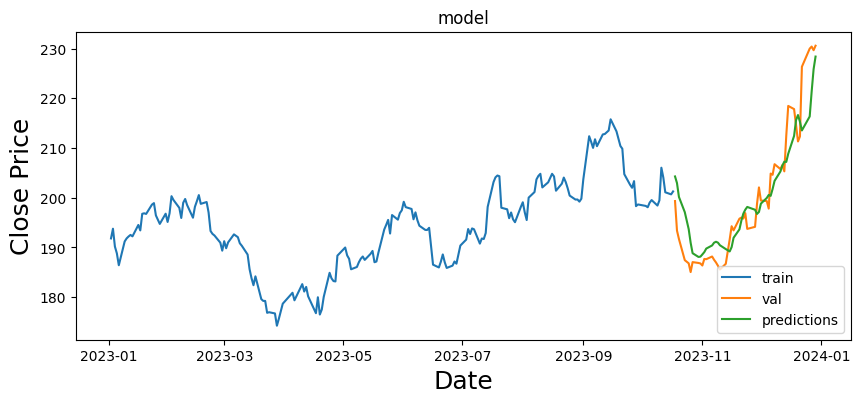

In [30]:
train = close_data[:train_data_len]
val = close_data[train_data_len:]
val['predictions']=predictions
plt.figure(figsize=(10,4))
plt.title('model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.plot(train['Close'])
plt.plot(val[['Close', 'predictions']],)
plt.legend(['train', 'val', 'predictions'], loc = 'lower right')
plt.show()


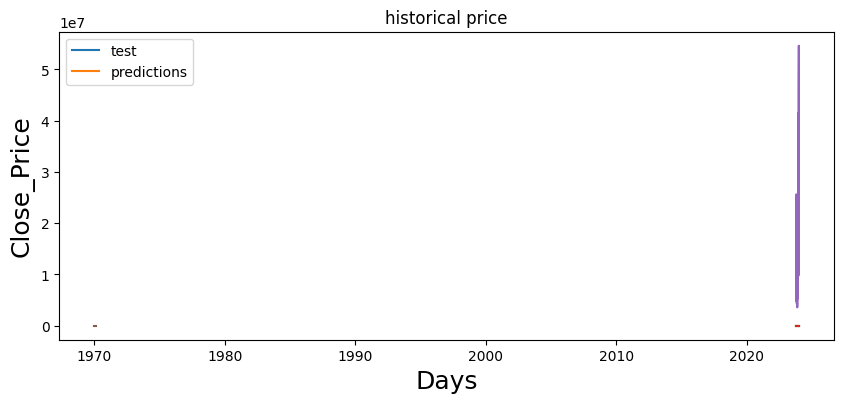

In [32]:
test = df[train_data_len:]
plt.figure(figsize=(10,4))
plt.title('historical price')
plt.plot(test)
plt.plot(predictions)
plt.xlabel('Days', fontsize=18)
plt.ylabel('Close_Price', fontsize=18)
plt.legend(['test', 'predictions'], loc = 'upper left')
plt.show()